<a href="https://colab.research.google.com/github/LarcesUece/RNP-Projects/blob/main/r_python_integr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### API

In [ ]:
import requests
import json
url_teste2 ="http://monipe-central.rnp.br/esmond/perfsonar/archive/?pscheduler-test-type=throughput&source=monipe-ce-banda.rnp.br&destination=monipe-sp-banda.rnp.br&bw-target-bandwidth=10000000000&time-range=15552000"
resp_teste2 = requests.get(url_teste2)
resp_json_teste2 = resp_teste2.json()

# 
url = "http://monipe-central.rnp.br/esmond/perfsonar/archive/1fcea1e943be43a59f460529e43c9c76/throughput/base?time-range=15552000"
throughput = requests.get(url)
throughput_json = throughput.json()
#print(throughput.status_code)

with open("throughput1.csv", "w", encoding="utf-8") as f:
    f.write("timestamp,value,interval\n")
    last = 0
    for dic in throughput_json:
        items = list(dic.values())
        last = items[0]-last
        f.write(f"{items[0]},{items[1]},{last}\n")
        last = items[0]

# 
url = "http://monipe-central.rnp.br/esmond/perfsonar/archive/acc629df77a24cf499f1f7715a2d8b14/throughput/base?time-range=15552000"
throughput = requests.get(url)
throughput_json = throughput.json()
#print(throughput.status_code)

with open("throughput2.csv", "w", encoding="utf-8") as f:
    f.write("timestamp,value,interval\n")
    last = 0
    for dic in throughput_json:
        items = list(dic.values())
        last = items[0]-last
        f.write(f"{items[0]},{items[1]},{last}\n")
        last = items[0]

#Teste usando summary window
url = "http://monipe-central.rnp.br/esmond/perfsonar/archive/1fcea1e943be43a59f460529e43c9c76/throughput/averages/86400"
headers = {"summary-window": "15552000"}
throughput = requests.get(url, headers)
throughput_json = throughput.json()
#print(throughput.status_code)
#print(len(throughput_json))
with open("throughput_summary1.csv", "w", encoding="utf-8") as f:
    f.write("timestamp,value,interval\n")
    last = 0
    for dic in throughput_json:
        items = list(dic.values())
        last = items[0]-last
        f.write(f"{items[0]},{items[1]},{last}\n")
        last = items[0]

#Teste usando summary window
url = "http://monipe-central.rnp.br/esmond/perfsonar/archive/acc629df77a24cf499f1f7715a2d8b14/throughput/averages/86400"
throughput = requests.get(url)
throughput_json = throughput.json()
print(throughput.status_code)
print(len(throughput_json))
with open("throughput_summary2.csv", "w", encoding="utf-8") as f:
    f.write("timestamp,value,interval\n")
    last = 0
    for dic in throughput_json:
        items = list(dic.values())
        last = items[0]-last
        f.write(f"{items[0]},{items[1]},{last}\n")
        last = items[0]

200
162


### Analise (R)

In [1]:
# bibliotecas do python
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# bibliotecas do R
base = importr('base')
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
ts_analysis = ('urca','tseries','forecast','e1071','Metrics')

from rpy2.robjects.vectors import StrVector
utils.install_packages(StrVector(ts_analysis))

In [3]:
# importando as bibliotecas do R usadas para predição
# acho que so precisa importar uma vez. (demora)

urca = importr('urca')
tseries = importr('tseries')
forecast = importr('forecast')
e1071 = importr('e1071')
metrics = importr('Metrics')

In [4]:
# %R - "linha mágica" - retorna valor como objeto python

# %%R - "célula mágica" - nao retorna valor mas consegue passar input e output  

# Arguments
# -i  -  variaveis de input
# -o  -  variaveis de output
# -h  -  altura do plot
# -w  -  largura do plot


%load_ext rpy2.ipython

### Valores de troughput

In [ ]:
tp_summ2 = pd.read_csv(r'/content/throughput_summary2.csv')

In [ ]:
tp_summ = pd.read_csv(r'/content/throughput_summary1.csv')

In [ ]:
tp = pd.read_csv(r'/content/throughput1.csv')

In [ ]:
tp2 = pd.read_csv(r'/content/throughput2.csv')

Transforma os dados coletados em datasets R

In [ ]:
%%R -i tp -h 300 -w 600

tp1_r = tp

tpts1 = ts(tp1_r[,2], start = c(1, 1), frequency = 1)

In [ ]:
%%R -i tp2 -h 300 -w 600

tp2_r = tp2

tpts2 = ts(tp2_r[,2], start = c(1, 1), frequency = 1)

In [ ]:
%%R -i tp_summ -h 300 -w 600

tp_r = tp_summ

tpts_summ1 = ts(tp_r[,2], start = c(1, 1), frequency = 1)

In [ ]:
%%R -i tp_summ2 -h 300 -w 600

tp_r2 = tp_summ2

tpts_summ2 = ts(tp_r2[,2], start = c(1, 1), frequency = 1)

Plot das Séries Temporais:

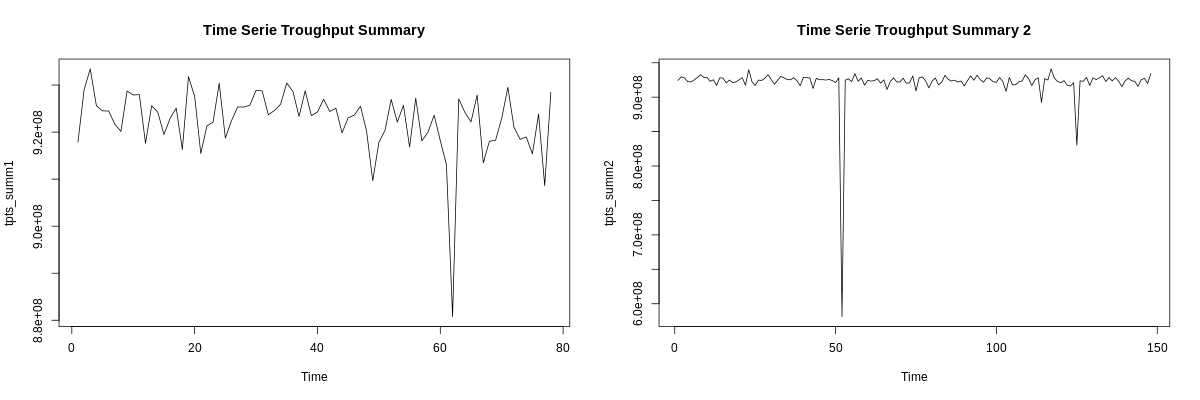

In [ ]:
%%R -h 400 -w 1200

par(mfrow = c(1,2))
plot(tpts_summ1, main = "Time Serie Troughput Summary")
plot(tpts_summ2, main = "Time Serie Troughput Summary 2")

### Throughput Total

In [ ]:
tp = pd.read_csv(r'/content/Throughput total - Página1.csv')

In [ ]:
%%R -i tp -h 400 -w 1200

tpr = tp

tpts1s = ts(tpr[,2], start = c(1, 1), frequency = 1)

plot(tpts1s, main = "Time Serie Troughput Summary")

In [ ]:
%%R -h 500 -w 1500

cleantpts = tsclean(tpts1)

#plot(tpts1, main = "Time Serie Troughput Summary")    
#plot(cleantpts, main = "Throughput 2 - Cleared")

###Clean

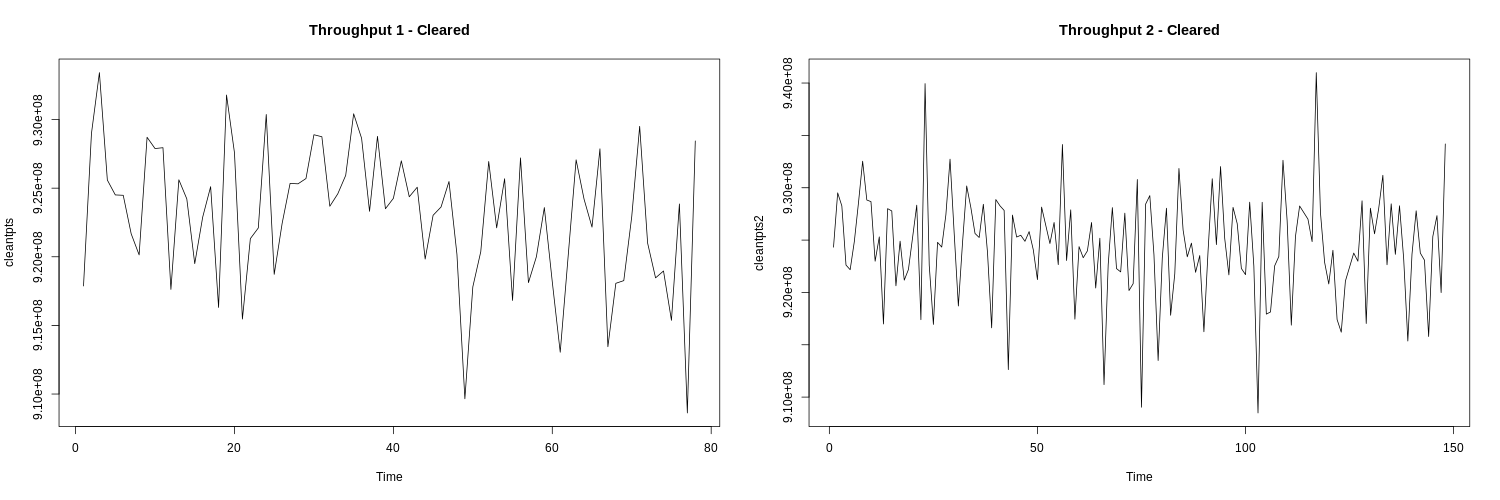

In [ ]:
%%R -h 500 -w 1500

cleantpts = tsclean(tpts_summ1)
cleantpts2 = tsclean(tpts_summ2)

par(mfrow = c(1,2))
#plot(tpts_summ1, main = "Time Serie Troughput Summary")
#plot(tpts_summ2, main = "Time Serie Troughput Summary 2")     
plot(cleantpts, main = "Throughput 1 - Cleared")
plot(cleantpts2, main = "Throughput 2 - Cleared")

###Diferenciação + Teste de Estacionariedade (Geral)


####################################### 
# KPSS Unit Root / Cointegration Test # 
####################################### 

The value of the test statistic is: 0.0431 


####################################### 
# KPSS Unit Root / Cointegration Test # 
####################################### 

The value of the test statistic is: 0.0365 


####################################### 
# KPSS Unit Root / Cointegration Test # 
####################################### 

The value of the test statistic is: 0.7496 


####################################### 
# KPSS Unit Root / Cointegration Test # 
####################################### 

The value of the test statistic is: 0.1822 



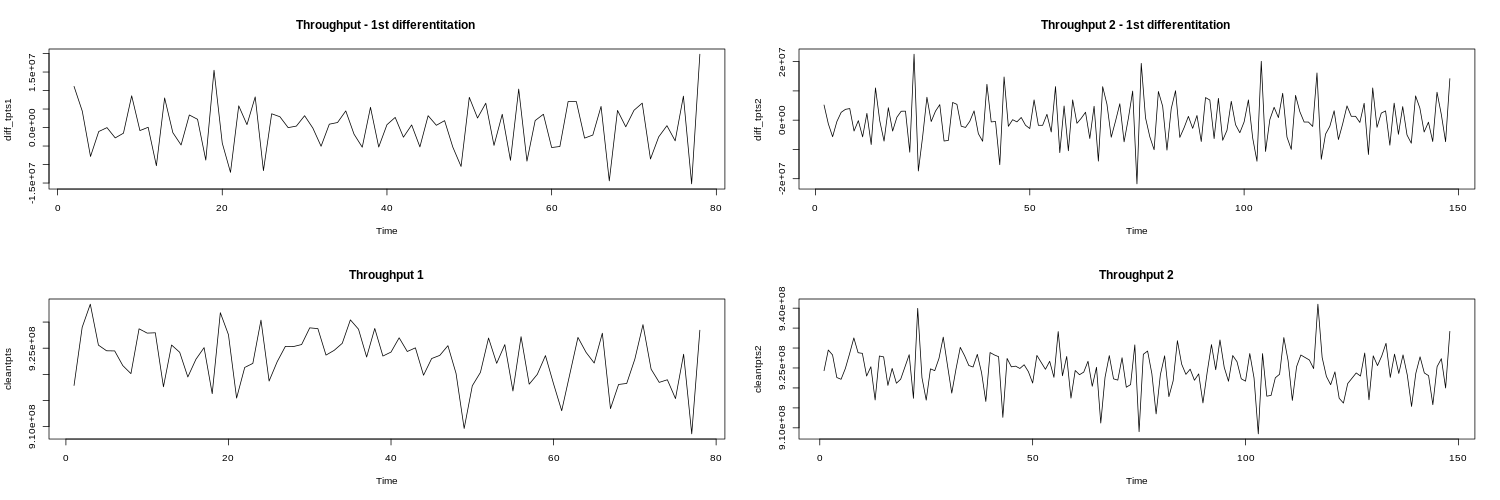

In [ ]:
%%R -h 500 -w 1500 # uma diferenciação

diff_tpts1 <- diff(cleantpts)
diff_tpts2 <- diff(cleantpts2)

par(mfrow = c(2,2))
plot(diff_tpts1, main = "Throughput - 1st differentitation ")
plot(diff_tpts2, main = "Throughput 2 - 1st differentitation ")
plot(cleantpts, main = "Throughput 1")
plot(cleantpts2, main = "Throughput 2")

print(ur.kpss(diff_tpts1))
print(ur.kpss(diff_tpts2))
print(ur.kpss(cleantpts))
print(ur.kpss(cleantpts2))

### Diferenciação + Teste de Estacionariedade (Correto)

In [ ]:
%%R
conjunto_treino = c("mytsTrain3", 
                    "mytsTrain6",
                    "mytsTrain9", 
                    "mytsTrain12",
                    "mytsTrain15",
                    "mytsTrain18",
                    "mytsTrain21",
                    "mytsTrain24",
                    "mytsTrain27",
                    "mytsTrain30",
                    "mytsTrain33",
                    "mytsTrain36",
                    "mytsTrain39",
                    "mytsTrain42",
                    "mytsTrain45",
                    "mytsTrain48",
                    "mytsTrain51",
                    "mytsTrain54",
                    "mytsTrain57",
                    "mytsTrain60",
                    "mytsTrain63")

###Teste Dataser Pandemia


In [ ]:
dataset = pd.read_csv(r'/content/TrafegoWAN-FWUECE-20200521-20201031.csv')

In [ ]:
# variavel de input (-i) do python (dataset) para dentro do R embarcado.
%%R -i dataset -h 300 -w 600

dataset_r = dataset # variavel do R 'dataset_r' recebe dataset do python.

#scripts R processando variável dataset_r que é dataset python.
myts = ts(dataset_r[,-1], start = c(1, 1), frequency = 24)
myts_medio = ts(dataset[,3], start = c(1, 1), frequency = 24)

In [ ]:
%R ndiffs(myts_medio)
# Apenas uma diferenciação torna a série estacionária

array([1.])

In [ ]:
%%R

myts_diff <- diff(myts_medio)

estac = ur.kpss(myts_diff)

print(estac)
#Serie estacionaria

In [ ]:
%%R -h 300 -w 800

clean_ts = tsclean(myts_diff)

In [ ]:
%%R 

acf(clean_ts)
acf(myts_diff)

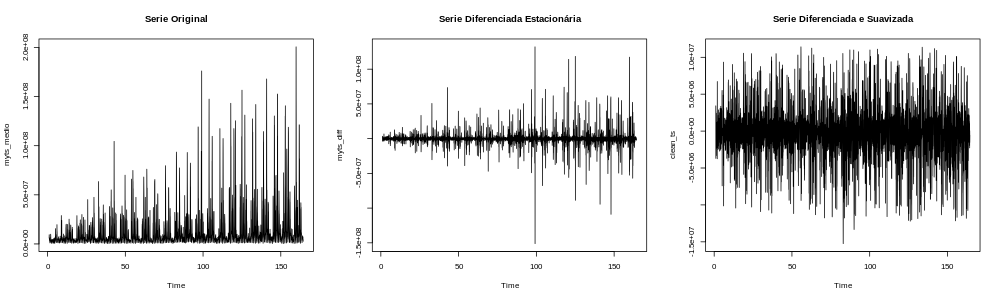

In [ ]:
%%R -h 300 -w 1000

par(mfrow = c(1,3))
plot(myts_medio, main = "Serie Original")
plot(myts_diff, main = "Serie Diferenciada Estacionária")
plot(clean_ts, main = "Serie Diferenciada e Suavizada")


In [ ]:
%%R -h 300 -w 1000
### Início do PRA ###
### Remoção Sazonalidade ###

Q <- ordered(cycle(myts_medio))

myts_medio.reg <- lm(myts_medio~Q)

ts_medio.des <- ts(resid(myts_medio.reg),
                   start = c(1,1), frequency = 24)

ts_medio.hat <- ts(fitted(myts_medio.reg),
                   start = c(1,1), frequency = 24)

# Normalização para evitar valores negativos após a desazonalização
myts.desn <- ts_medio.des + mean(fitted(myts_medio.reg))

# Limpeza apos desazonalização

tsclean = tsclean(myts.desn)

# Diferenciação

tsdiff = diff(tsclean)

x = ur.kpss(tsdiff)
print(x)

plot(tsdiff)

par(mfrow=c(1,3))
plot(myts_medio, main = "Serie Original")
plot(myts.desn, main = "Serie Desazonalizada")
plot(tsclean, main = "Serie Desazonalizada + Suavizada")

In [ ]:
data2 = %R dataset_r # variavel data2 recebe dataset_r, que é uma variavel R.

In [ ]:
type(data2) # dataset python (dataset) -> dataset R (dataset_r) -> dataset python (data2)